In [2]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0          ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0.9000     ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
monday = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv')
monday %>% head

Parsed with column specification:
cols(
  .default = col_double(),
  EPISODE = col_character(),
  TITLE = col_character()
)

See spec(...) for full column specifications.



EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,⋯,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,⋯,0,1,1,0,0,0,0,0,0,0
S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,1,0
S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,1,0
S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,⋯,0,1,1,0,0,0,0,0,0,0
S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,0,0
S01E06,"""WINTER MOON""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,1,0


In [4]:
Tuesday = monday %>%
    pivot_longer(cols = -one_of('EPISODE', 'TITLE'), names_to = 'elements', values_to = 'x') %>%
    filter(x>0) %>%
    mutate(elements=fct_lump(elements,n=10)) %>%
    mutate(elements=fct_rev(fct_infreq(elements) ))

Tuesday %>% head

EPISODE,TITLE,elements,x
<chr>,<chr>,<fct>,<dbl>
S01E01,"""A WALK IN THE WOODS""",BUSHES,1
S01E01,"""A WALK IN THE WOODS""",DECIDUOUS,1
S01E01,"""A WALK IN THE WOODS""",GRASS,1
S01E01,"""A WALK IN THE WOODS""",RIVER,1
S01E01,"""A WALK IN THE WOODS""",TREE,1
S01E01,"""A WALK IN THE WOODS""",TREES,1


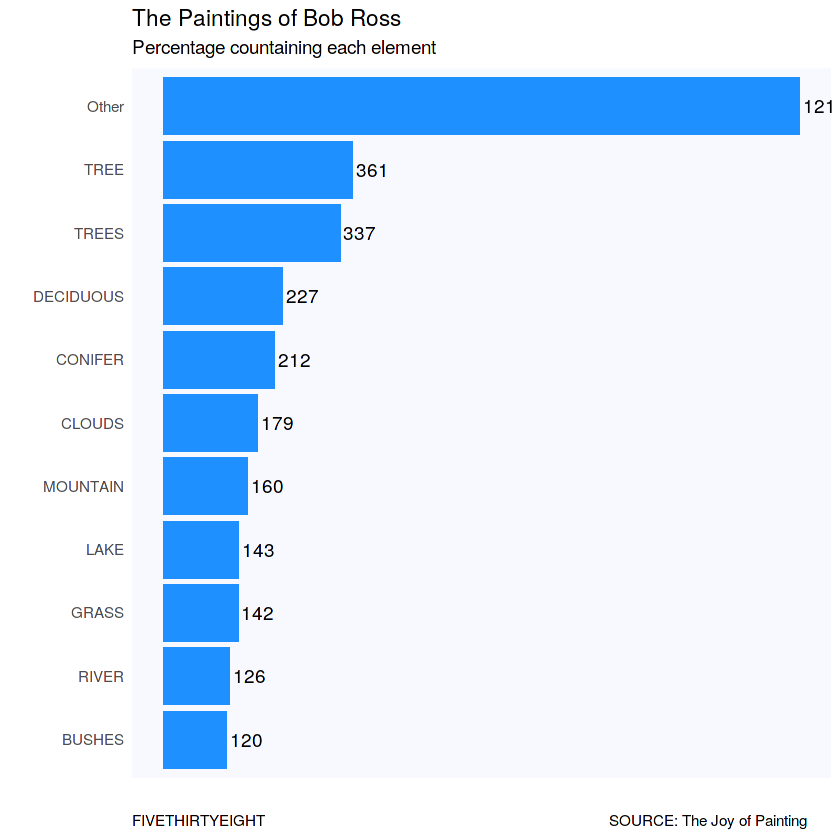

In [24]:
wed = ggplot(Tuesday, aes(x=elements))
wed = wed + geom_bar(fill = "#1E90FF")
wed = wed + coord_flip()
wed = wed + geom_text(stat='count', aes(label=..count..),hjust=-.1)
wed = wed + theme(axis.text.x=element_blank())
wed = wed + labs(title = "The Paintings of Bob Ross", 
             subtitle="Percentage countaining each element", 
             caption="FIVETHIRTYEIGHT                                                                                      SOURCE: The Joy of Painting",
             x="", 
             y="")
wed = wed + theme(panel.background = element_rect(fill = "#F8F8FF"),
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(), 
            axis.ticks = element_blank(),
            plot.caption = element_text(hjust = 0,color="black"))
           
wed